In [12]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# Firstly i want to check how the model works on all the features. Then tune it

In [13]:
%store -r X_train
%store -r X_test
%store -r y_train
%store -r y_test

sdgc_clf = SGDClassifier()
sdgc_clf.fit(X_train,y_train)
y_pred = sdgc_clf.predict(X_test)
sdgc_clf.score(X_test,y_test)


0.8474

### Score for the 100k records is 84.7% correct predictions

[[20210  1307]
 [ 2508   975]]


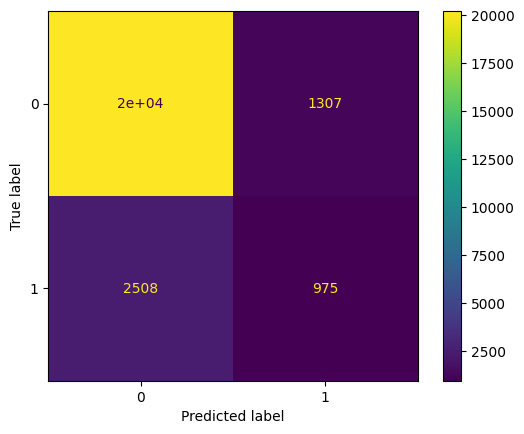

In [23]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()

### As you can see our model performs in a way that is not very helpful for the predicting real diabetes.
It has high performance in predicting that person is not sick on diabetes. Preferably we would like the model to predict sickness.
Such a situation may arise because there is an imbalance in the dataset, with a disparity between the number of records for healthy individuals and the number of records for those who are sick.

In [22]:
%store -r data_reduced_to_100k
(data_reduced_to_100k["Diabetes_binary"]==0).sum(),(data_reduced_to_100k["Diabetes_binary"]==1).sum()

(85935, 14065)

It shows that there is 14k records of diabetes and 85k records of healthy people. We can use methods like SMOTE to reduce inbalance